In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import asilib
import asilib.map
import asilib.asi
import numpy as np
import matplotlib.gridspec

import IRBEM

In [2]:
time = '2021-11-04T06:59'
location_codes = ['FSMI', 'LUCK', 'RABB', 'PINA', 'GILL']
map_alt = 110
min_elevation = 10
lon_bounds=(-125, -75)
lat_bounds=(40, 70)

In [3]:
asis = asilib.Imagers(
    [asilib.asi.trex_rgb(location_code, time=time) 
    for location_code in location_codes]
    )

Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


Let's map the images with the T89 magnetic field model

In [4]:
_irbem_obj = IRBEM.MagFields(kext='T89')
_coords_obj = IRBEM.Coords()

def b_model(time, lla):
    output_dictionary = _irbem_obj.find_magequator(
        {'datetime':time, 'x1':lla[2], 'x2':lla[0], 'x3':lla[1]},
        {'Kp':30}
        )
    equator_sm = _coords_obj.transform(time, output_dictionary['XGEO'], 1, 2)  # Convert to GSM coordinates
    return equator_sm

Mapping to magnetic equator: |##########################################| 100%


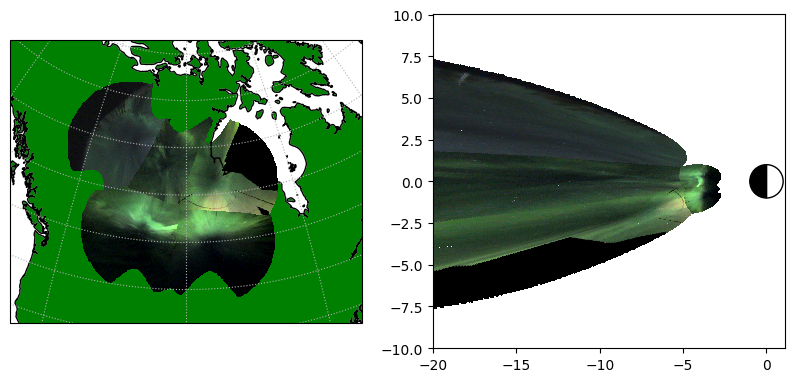

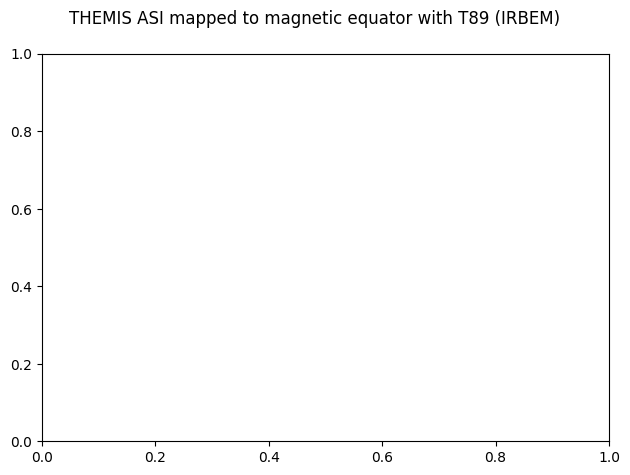

In [ ]:
fig = plt.figure(figsize=(10, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, fig, width_ratios=(1, 1))
ax = asilib.map.create_map(fig_ax=(fig, gs[0, 0]), lat_bounds=lat_bounds, lon_bounds=lon_bounds)
bx = fig.add_subplot(gs[0, 1])
bx.set_aspect('equal')

asis.plot_map(ax=ax, asi_label=False)

x_grid, y_grid = np.meshgrid(np.linspace(-20, 1.1, num=1000), np.linspace(-10, 10, num=1001))
fig, ax = plt.subplots()
asis.plot_map_eq(ax=bx, b_model=b_model, x_grid=x_grid, y_grid=y_grid, max_valid_grid_distance=0.1)

fig.suptitle('TREx mapped to magnetic equator with T89 (IRBEM)')
plt.tight_layout()
plt.show()